In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [45]:
# Define the objective function (Rastrigin function)
def rastrigin_function(x, A=10):
    return A + x**2 - A * np.cos(2 * np.pi * x)

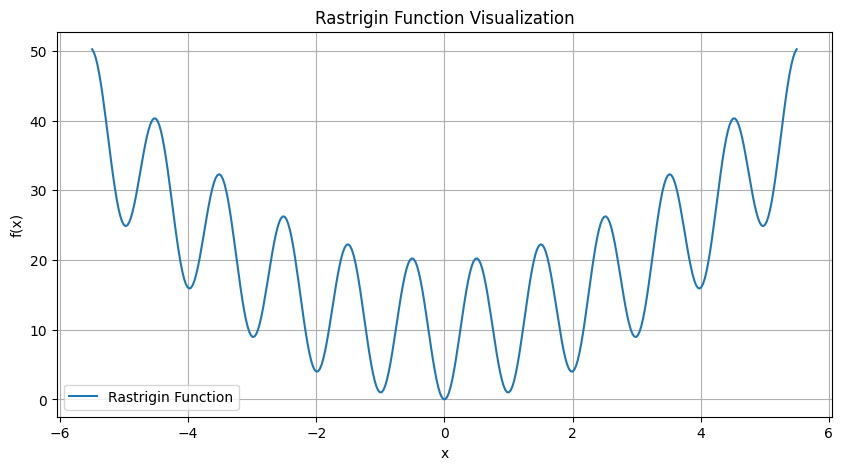

In [10]:
x_values = np.linspace(-5.5, 5.5, 400)

y_values = np.array([rastrigin_function(x) for x in x_values])

plt.figure(figsize=(10, 5))
plt.plot(x_values, y_values, label='Rastrigin Function')
plt.title('Rastrigin Function Visualization')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.show()


In [46]:
class Particle:
    def __init__(self, bounds):
        low, high = bounds
        self.position = np.array([np.random.uniform(low, high)])
        # print(self.position)  # Debugging: Uncomment if needed
        self.velocity = np.zeros_like(self.position)
        # print(self.velocity)  # Debugging: Uncomment if needed
        self.best_position = self.position.copy()
        self.best_value = float('inf')
        # print(self.best_value)  # Debugging: Uncomment if needed

    def update_velocity(self, global_best_position, inertia_weight, c1, c2):
        r1 = np.random.random()
        r2 = np.random.random()
        cognitive_velocity = c1 * r1 * (self.best_position - self.position)
        social_velocity = c2 * r2 * (global_best_position - self.position)
        self.velocity = inertia_weight * self.velocity + cognitive_velocity + social_velocity

    def update_position(self, bounds):
        self.position += self.velocity
        low, high = bounds
        self.position[0] = np.clip(self.position[0], low, high)



In [49]:
def particle_swarm_optimization(objective_function, bounds, num_particles, max_iter):

    inertia_weight = 0.5
    c1 = 1.0
    c2 = 2.0

    # Initialize particles
    swarm = [Particle(bounds) for _ in range(num_particles)]
    global_best_position = np.array([0.0])  # Corrected for 1D
    global_best_value = float('inf')

    for iteration in range(max_iter):
        for particle in swarm:
            fitness_value = objective_function(particle.position[0])

            # Update personal best
            if fitness_value < particle.best_value:
                particle.best_value = fitness_value
                particle.best_position = particle.position.copy()

            # Update global best
            if fitness_value < global_best_value:
                global_best_value = fitness_value
                global_best_position = particle.position.copy()

        # Update velocity and position of each particle
        for particle in swarm:
            particle.update_velocity(global_best_position, inertia_weight, c1, c2)
            particle.update_position(bounds)

        print(f"Iteration {iteration+1}/{max_iter}, Global Best Value = {global_best_value:.6f}")

    return global_best_position[0], global_best_value

In [51]:
bounds = (-5.12, 5.12)  # 1-dimensional problem
num_particles = 5
max_iter = 100

best_position, best_value = particle_swarm_optimization(rastrigin_function, bounds, num_particles, max_iter)
print(f"\nOptimal solution: {best_position}")
print(f"Objective function value at optimal solution: {best_value}")

Iteration 1/100, Global Best Value = 7.405704
Iteration 2/100, Global Best Value = 1.067928
Iteration 3/100, Global Best Value = 1.067928
Iteration 4/100, Global Best Value = 1.067928
Iteration 5/100, Global Best Value = 1.067928
Iteration 6/100, Global Best Value = 1.067928
Iteration 7/100, Global Best Value = 1.067928
Iteration 8/100, Global Best Value = 1.067928
Iteration 9/100, Global Best Value = 1.021372
Iteration 10/100, Global Best Value = 0.999721
Iteration 11/100, Global Best Value = 0.995454
Iteration 12/100, Global Best Value = 0.994960
Iteration 13/100, Global Best Value = 0.994960
Iteration 14/100, Global Best Value = 0.994960
Iteration 15/100, Global Best Value = 0.994960
Iteration 16/100, Global Best Value = 0.994960
Iteration 17/100, Global Best Value = 0.994960
Iteration 18/100, Global Best Value = 0.994960
Iteration 19/100, Global Best Value = 0.994960
Iteration 20/100, Global Best Value = 0.994960
Iteration 21/100, Global Best Value = 0.994960
Iteration 22/100, Glob